     StudentID            Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1.0            John    Male            85.0               15.0   
1          2.0           Sarah  Female            90.0               20.0   
2          3.0            Alex    Male            78.0               10.0   
3          4.0         Michael    Male            92.0               25.0   
4          5.0            Emma  Female             NaN               18.0   
..         ...             ...     ...             ...                ...   
995        NaN  Kenneth Murray    Male            85.0               20.0   
996     4497.0       Amy Stout  Female            91.0                NaN   
997     1886.0             NaN    Male            85.0                8.0   
998     7636.0  Joseph Sherman    Male            88.0               17.0   
999     8021.0     Maria Walls  Female            88.0               10.0   

     PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  

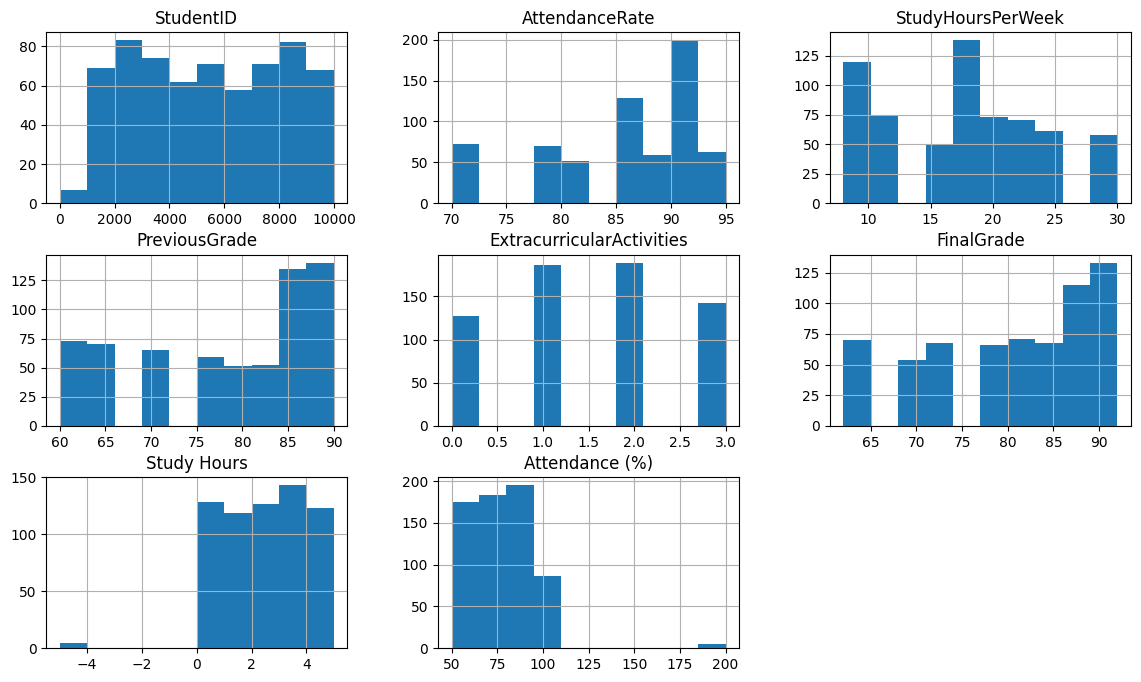

/nDataTypes:
StudentID                    float64
Name                          object
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object
     StudentID            Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1.0            John    Male            85.0               15.0   
1          2.0           Sarah  Female            90.0               20.0   
2          3.0            Alex    Male            78.0               10.0   
3          4.0         Michael    Male            92.0               25.0   
6          7.0          Daniel    Male            70.0                8.0   
..         ...             ...     ...             ...             

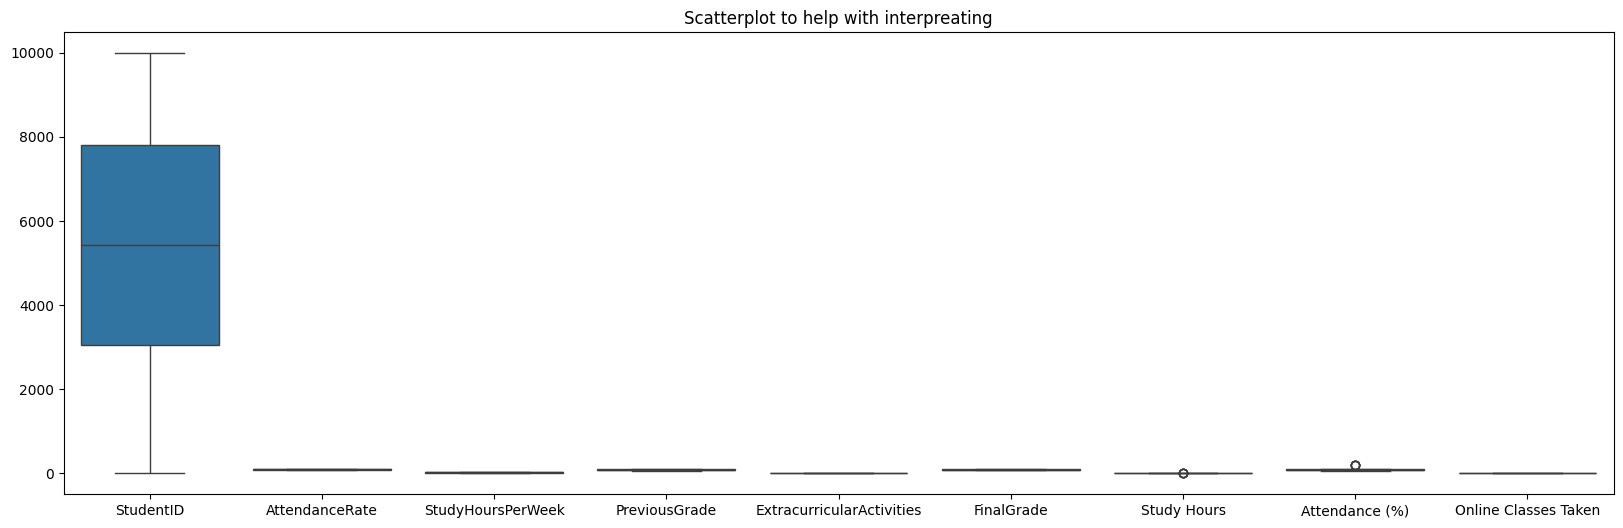

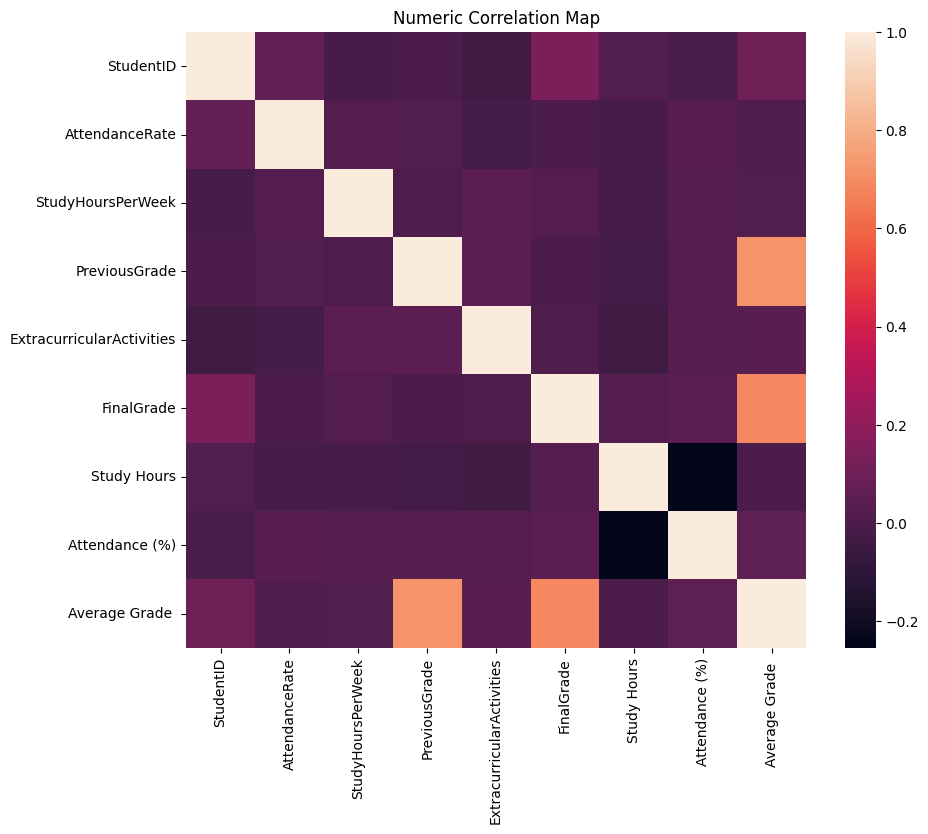

                       Feature  Chi2 Score
336        Name_Kimberly Blair   11.403846
602         Name_Thomas Barnes   11.403846
327          Name_Kelly Harper   11.403846
323           Name_Kelly Baker   11.403846
315       Name_Kathryn Randall   11.403846
..                         ...         ...
204          Name_Erica Miller    7.284901
643     ParentalSupport_Medium    5.727833
641                Gender_Male    4.914060
642        ParentalSupport_Low    4.753690
644  Online Classes Taken_True    1.837130

[645 rows x 2 columns]
                     Feature        VIF
0                  StudentID   5.172346
1             AttendanceRate  76.381203
2          StudyHoursPerWeek   8.615885
3  ExtracurricularActivities   3.187913
4                Study Hours   3.511247
5             Attendance (%)  19.239801
6             Average Grade   77.998877
X shape: (645, 653) y shape: (645,)
(516, 653)
(516,)
(129, 653)
(129,)
[62. 85. 90. 88. 80. 62. 92. 78. 80. 92. 78. 72. 80. 72. 68. 92. 87.

'Its best performance was very low: 38% accuracy, 41% precision, 38% recall, and 37% F1 score. \nThis demonstrates that the model is highly prone to misclassifying instances into classes-both over-and under-identifying actual cases. \nIn general, these results show that the model is not reliable in the detection of patterns within the dataset, hence there is a need for further feature selection or tuning or using a different model altogether.\n'

In [1]:
#WEEK 1
"""
--Problem and importance- This project is about predicting how students will perform based on different factors.
This is important because it can help teachers know which students might need extra help. 
--This dataset has various features that will help us predict our certain target
Features: Attendance, Study Hours, Previous grades, Extracurricular activities, Parental support, Final grade, and if the class is online or not 
Target: The final grade
"""
#getting the dataset
import pandas as pd
#Load dataset
df = pd.read_csv("student_performance_updated_1000.csv")
#display first few rows
print(df.head(3000))
#understanding the dataset
df.describe()

#cleaning the data
import matplotlib.pyplot as plt
import seaborn as sns
#check and handle missing values
print(df.isnull().sum)
df=df.dropna()
#visualize key patters
df.hist(figsize=(14,8))
plt.show()

#checking the datatypes
print("/nDataTypes:")
print(df.head(3000).dtypes)
#check for incorrect datatypes (object)
df.select_dtypes(include="object").head(3000)
#check for incorrect datatypes (int)
df.select_dtypes(include="float64").head(3000)

#checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,6))
sns.boxplot(data=df)
plt.title("Scatterplot to help with interpreating")
plt.show

df["Average Grade "] = (df["PreviousGrade"] + df["FinalGrade"]) /2
print(df.head(3000))

#ANALYSIS for numeric
numeric_data = df.select_dtypes(include="number")
nonnumeric_data = df.select_dtypes(exclude="number")
print("Numerical Data:", numeric_data.columns.tolist())
print("Categorical Data:", nonnumeric_data.columns.tolist())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr())
plt.title("Numeric Correlation Map")
plt.show()

#encoding categorical variables
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
# One-hot encode categorical columns
cat_encoded = pd.get_dummies(nonnumeric_data, drop_first=True)
# Scale them - because chi-square only works with positive numbers
scaler = MinMaxScaler()
cat_scaled = scaler.fit_transform(cat_encoded)

# Chi-square scores vs the target (G3 final grade)
chi_scores = chi2(cat_scaled, df['FinalGrade'])
chi_results = pd.DataFrame({
    "Feature": cat_encoded.columns,
    "Chi2 Score": chi_scores[0]
})
print(chi_results.sort_values("Chi2 Score", ascending=False))

#VIF
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = numeric_data.copy()  
target_cols = ['FinalGrade', 'PreviousGrade'] 
for c in target_cols:
    if c in features.columns:
        features = features.drop(columns=[c])
features = pd.get_dummies(features, drop_first=True)
# Convert categorical variables to dummy/one-hot variables
X = sm.add_constant(features, has_constant='add')
vif_data = pd.DataFrame(columns=["Feature", "VIF"])
# Only keep columns with non-zero variance (required for VIF)
valid_columns = [col for col in X.columns if X[col].var() > 0]
# Calculate VIF for each feature
vif_data["Feature"] = valid_columns
vif_data["VIF"] = [variance_inflation_factor(X[valid_columns].values, i) for i in range(len(valid_columns))]
print(vif_data)

# Ensure features/X are built here (change target_col if your target column is different)
target_col = "FinalGrade"  # <- replace with "target" only if that column actually exists
if target_col not in df.columns:
    raise KeyError(f"Target column {target_col!r} not found. Available columns: {df.columns.tolist()}")
# Build features by dropping the target (and any other columns you don't want as features)
features = df.drop(columns=[target_col])
# One-hot encode categorical features
X = pd.get_dummies(features, drop_first=True)
y = df[target_col]
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X shape:", X.shape, "y shape:", y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

from sklearn.ensemble import RandomForestClassifier
#Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) # - uses my 80% training data
y_pred = model.predict(X_test)
print(y_pred[:1500])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred) #the accuracy is a bit low becuase the model might not be finidng a clear pattern to predict
#Precision - shows how many of the predicted grades were correct
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
#Recall - shows how many positive cases the model actually found successfully
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
#a balance of precision and recall; it confirms the overall performance based on if the model can consistently predict the final grade well
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

#Summary
"""Its best performance was very low: 38% accuracy, 41% precision, 38% recall, and 37% F1 score. 
This demonstrates that the model is highly prone to misclassifying instances into classes-both over-and under-identifying actual cases. 
In general, these results show that the model is not reliable in the detection of patterns within the dataset, hence there is a need for further feature selection or tuning or using a different model altogether.
"""